In [1]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
import numpy as np
from ipywidgets import interact, FloatSlider


%matplotlib inline

In [2]:
def compute_J(x,y,theta0, theta1):
    #theta = np.array([theta0,theta1])
    
    x= np.c_[x,np.ones(len(x))] # voeg een kolom met 1 waarden toe aan x
    theta = np.array([theta1,theta0])
    h = np.dot(theta,x.T) 
    e = h.T - y
    J = np.sum(e**2)/len(x)
    return(J)
    
    #x = np.concatenate((x,np.ones((len(x),1))),axis =1)
    # print(np.ones((len(x),1)))
    #h = np.dot(theta,x.T)
  

In [3]:
data = np.genfromtxt('bloeddruk_GDS.csv',delimiter=',')
J = compute_J(data[:,1],data[:,2],2.85,1.67)
print(J)

9.771227272727272


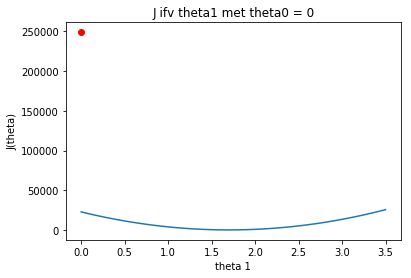

In [4]:
# Bereken de kostenfunctie J(theta1, theta0 = 0) en plot in 2D

theta0 = 0
theta1 = np.linspace(0,3.5,100)
J = np.zeros(len(theta1))
for t in range(0,len(theta1)):
    J[t] = compute_J(data[:,1],data[:,2],theta0,theta1[t])

    
fig, ax = plt.subplots()

ax.plot(0, 249000,'ro')
ax.plot(theta1, J )
#ax.legend(loc=2); # legende linksboven
ax.set_xlabel('theta 1')
ax.set_ylabel('J(theta)')
ax.set_title('J ifv theta1 met theta0 = 0');

    

In [5]:
def callCompute_J(theta0,theta1):
    Jtheta1 = compute_J(data[:,1],data[:,2],theta0,theta1)
    
    theta1Axis = np.linspace(0,3,40)
    
    xAxis = np.linspace(0,150,10)
    yAxis = xAxis * theta1 + theta0
    J = np.zeros(len(theta1Axis))
    for t in range(0,len(theta1Axis)):
        J[t] = compute_J(data[:,1],data[:,2],theta0,theta1Axis[t])
        
    
    fig_subplots = plt.figure()
    fig_subplots.set_size_inches(20,15)
    ax1 = fig_subplots.add_subplot(2,3,1)
    ax2 = fig_subplots.add_subplot(2,3,2)
    
    ax1.plot(theta1, Jtheta1,'ro')
    ax1.plot(theta1Axis, J )
    #ax.legend(loc=2); # legende linksboven
    ax1.set_xlabel('theta1')
    ax1.set_ylabel('J')
    ax1.set_title('Kostenfunctie J');
    
    ax2.scatter(data[:,1], data[:,2])
    ax2.plot(xAxis,yAxis,'r')
    ax2.set_xlabel('gewicht [kg]')
    ax2.set_ylabel('Bloeddruk [mmHg]')
    ax2.set_title('Bloeddruk ifv gewicht');
    
    print('J = ', Jtheta1)
    fig_subplots.tight_layout()

In [6]:
interact(callCompute_J,theta0=FloatSlider(min=-20, max=20.0, step=1, value=0),theta1=FloatSlider(min=-1, max=3, step=0.1, value=0))

interactive(children=(FloatSlider(value=0.0, description='theta0', max=20.0, min=-20.0, step=1.0), FloatSlider…

<function __main__.callCompute_J(theta0, theta1)>

## 3D plots

In [7]:
theta_0 = np.linspace(-20,30,100)
theta_1 = np.linspace(1.3,2,100)
J = np.zeros((len(theta_0),len(theta_1)))

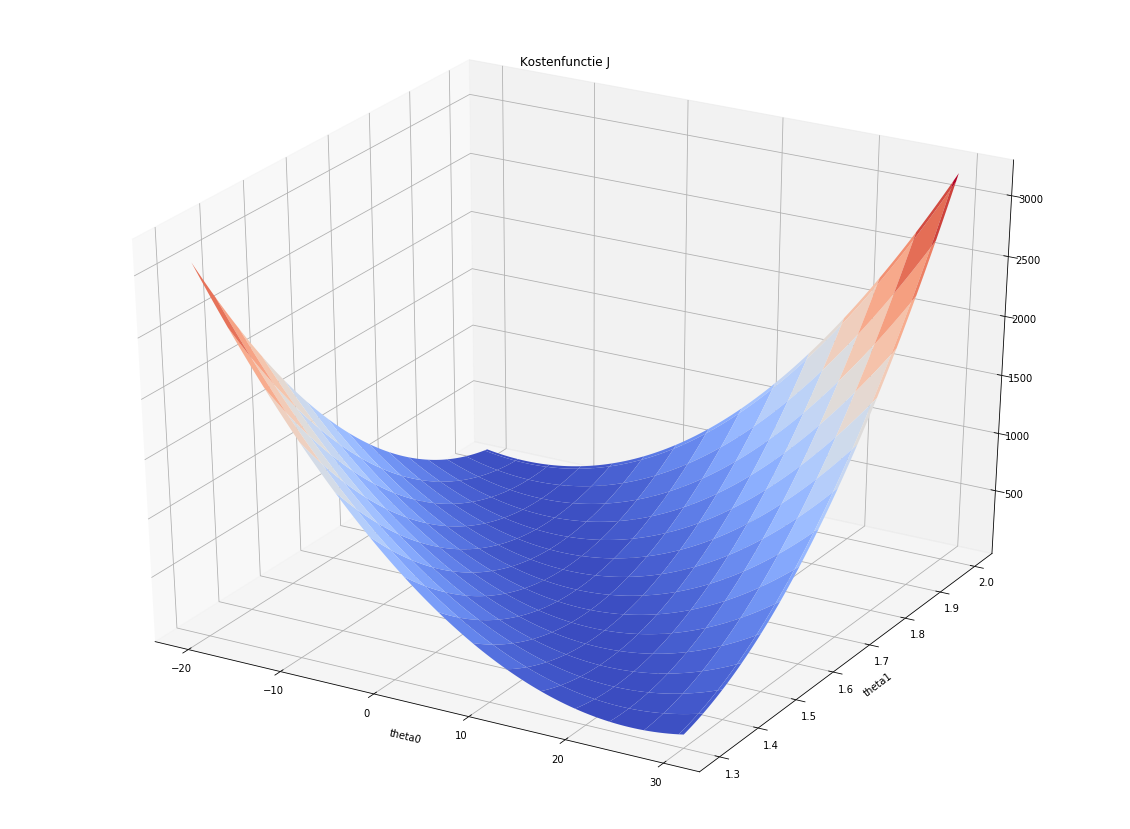

In [8]:
for t0 in range(0,len(theta_0)):
    for t1 in range(0,len(theta_1)):
        J[t0,t1]= compute_J(data[:,1],data[:,2],theta_0[t0],theta_1[t1])
        
x ,y = np.meshgrid(theta_0, theta_1)

fig3D = plt.figure()
fig3D.set_size_inches(20,15)
axis3D = fig3D.add_subplot(111, projection='3d')
axis3D.plot_surface(x, y, J, rstride=7, cstride=7,cmap=cm.coolwarm)
#axis3D.scatter3D(20,1.5,35000,c='r', marker='o',s=100)
axis3D.set_xlabel('theta0')
axis3D.set_ylabel('theta1')
axis3D.set_title('Kostenfunctie J');



## Gradient descent 

In [9]:
# Calculate gradients

def gradient_J(x,y,theta0,theta1):
    g0 = 0
    g1 = 0
    m = len(y)
    for gcounter in range(0,m):
        g0 = g0 + ((theta1*x[gcounter]+theta0)-y[gcounter])
        g1 = g1 + ((theta1*x[gcounter]+theta0)-y[gcounter])*x[gcounter]
    return g0,g1
                         
    

J =  22696.090909090908  theta0 =  0  theta1 =  0
J =  421.2898639140627  theta0 =  0.01651  theta1 =  1.4693900000000002
J =  17.189065309697867  theta0 =  0.0187357131  theta1 =  1.6673032948
J =  9.858025309778972  theta0 =  0.019037464146102998  theta1 =  1.693960373007708
J =  9.725028334006293  theta0 =  0.019080075199412006  theta1 =  1.697550814129939
J =  9.7226154621224  theta0 =  0.019087782477797063  theta1 =  1.6980343914137774
J =  9.722571596388125  theta0 =  0.01909078853718259  theta1 =  1.6980995027168932
J =  9.722570708244431  theta0 =  0.0190931613840353  theta1 =  1.698108250501656
J =  9.722570599783705  theta0 =  0.01909544894140696  theta1 =  1.6981094066389704
J =  9.722570505467795  theta0 =  0.019097725009492614  theta1 =  1.6981095402512227


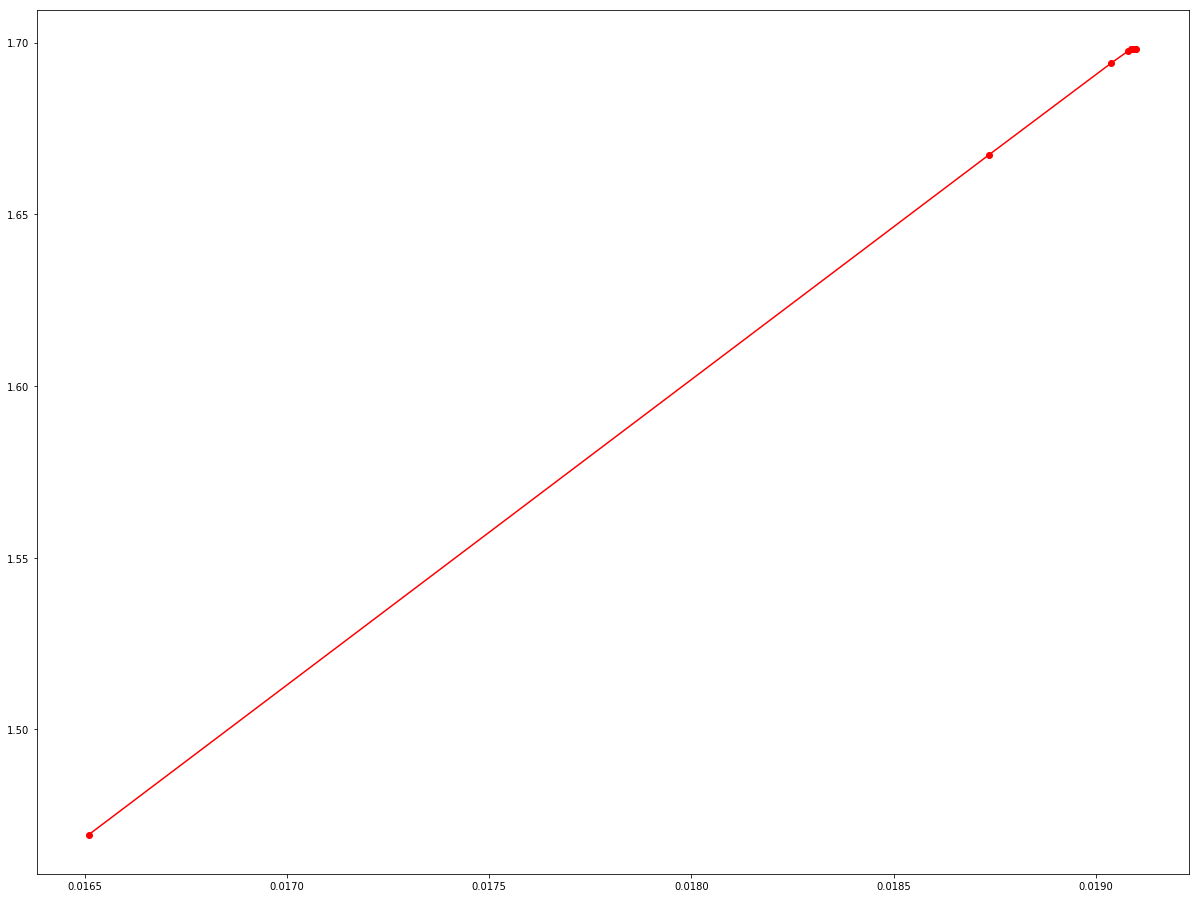

In [10]:

fig_trajectory = plt.figure()
fig_trajectory.set_size_inches(20,15)

theta0 = 0
theta1 = 0
mu = 0.00001
iterations =10

xt = np.zeros((iterations))
yt = np.zeros((iterations))
zt = np.zeros((iterations))

for s in range(0,iterations):
    
    g0,g1 = gradient_J(data[:,1],data[:,2],theta0,theta1)
    J = compute_J(data[:,1],data[:,2],theta0,theta1)
    print('J = ',J,' theta0 = ',theta0,' theta1 = ',theta1)
    theta0 = theta0 - mu*g0
    theta1 = theta1 - mu*g1
    
    xt[s] = theta0;
    yt[s] = theta1;
    zt[s] = J
    
    #axis3D.scatter3D(theta0,theta1,J+10000,c='r', marker='o',s=200)
    #axis3D.plot(xt,yt,zt)
trajectory = fig_trajectory.add_axes([0.1, 0.1, 0.8, 0.8])

trajectory.plot(xt,yt,'-ro')

      
   
